# Check data as a beganning 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'anxiety.csv'

df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

# Checking the data

In [39]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.416273,6.771809,2.916418,313.306636,9.724909,5.808727,90.989364,20.791909,3.080727,4.684182,5.212545,4.150091
std,13.347281,1.615078,1.837120,172.934891,5.715738,2.941493,17.137804,5.180782,1.401307,2.852670,2.880015,2.116551
min,18.000000,0.200000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.600000,1.400000,163.000000,5.000000,3.000000,76.000000,16.000000,2.000000,2.000000,3.000000,3.000000
50%,40.000000,6.800000,2.800000,326.500000,10.000000,6.000000,92.000000,21.000000,3.000000,5.000000,5.000000,4.000000
75%,52.000000,7.900000,4.200000,462.000000,15.000000,8.000000,106.000000,25.000000,4.000000,7.000000,8.000000,5.000000
max,64.000000,12.500000,11.200000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,9.000000,10.000000,10.000000


# Check for duplicate

In [40]:
df[df.duplicated()]

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
251,51,Male,Engineer,7.7,3.6,504,5,No,No,5,70,24,1,No,Yes,3,Yes,3,3
319,47,Other,Doctor,4.9,0.5,534,5,No,No,9,97,20,3,No,Yes,7,Yes,1,10
330,39,Male,Other,5.0,5.3,120,12,Yes,No,3,99,12,1,Yes,Yes,6,No,10,4


# Drop duplcate values

In [41]:
df = df.drop_duplicates()

# Check for null values

In [42]:
df.isna().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

<span style="color:green">Great! we have no null values<span>

# Check disribution of sleeping hours

In [43]:
def boxPlot_normaldist(points, name,bins=30):
    plt.figure(figsize=(12, 5))

    # Boxplot (left side)
    plt.subplot(1, 2, 1)
    plt.boxplot(points, vert=False)
    plt.title(f"Boxplot of {name.split(' ')[0]}")
    plt.xlabel(name)


    plt.subplot(1, 2, 2)
    sns.histplot(points, bins=bins, kde=True, color='skyblue')
    plt.title(f'Normal Distribution of {name}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

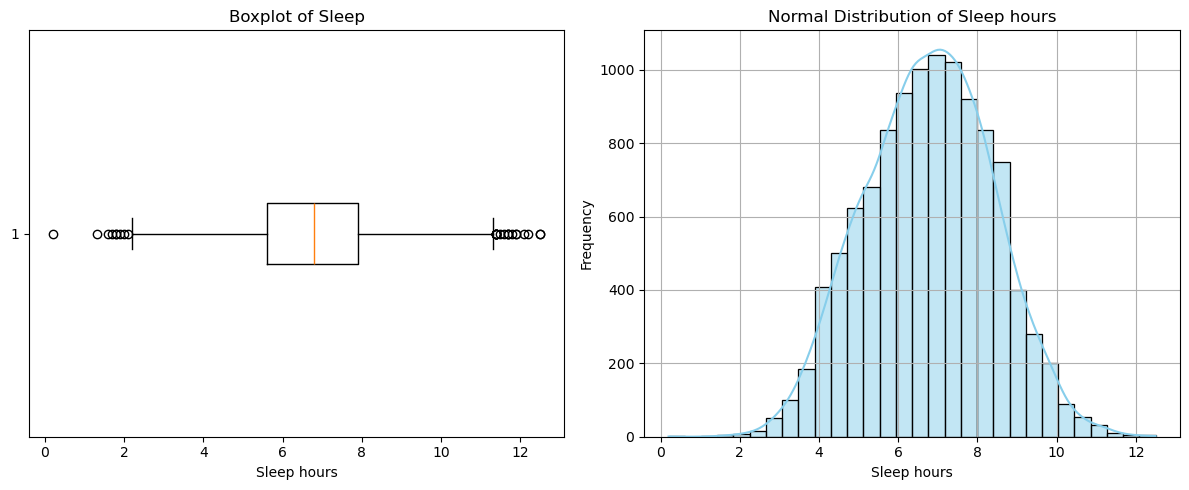

In [44]:
boxPlot_normaldist(df['Sleep Hours'],"Sleep hours")

# Check for outliers

In [45]:
Q1 = df['Sleep Hours'].quantile(0.25)
Q3 = df['Sleep Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[ (df['Sleep Hours'] > upper_bound) | (df['Sleep Hours'] < lower_bound)]

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
289,53,Male,Other,11.8,0.8,457,5,No,No,4,90,17,5,Yes,No,1,No,2,2
1035,19,Male,Student,11.4,1.6,166,9,No,No,3,66,23,3,No,Yes,1,No,2,1
1410,24,Male,Other,2.1,3.9,299,10,Yes,No,7,110,24,1,No,No,5,Yes,9,4
2202,54,Female,Scientist,11.6,1.8,563,9,No,No,4,79,13,3,Yes,Yes,4,Yes,10,2
2618,56,Male,Other,12.2,2.6,242,15,No,Yes,4,118,24,4,Yes,No,7,Yes,3,1
2792,19,Female,Doctor,11.7,4.9,520,2,No,No,6,85,24,2,No,No,5,Yes,10,3
2884,36,Other,Lawyer,1.9,5.9,589,2,Yes,No,1,80,25,4,Yes,Yes,9,Yes,10,3
3717,50,Male,Engineer,11.4,1.5,109,7,No,No,7,68,17,3,No,Yes,7,No,2,3
3791,20,Female,Lawyer,2.0,2.7,341,14,No,No,6,80,15,1,Yes,No,4,Yes,2,6
3898,28,Male,Engineer,12.5,1.1,538,12,No,No,3,84,25,1,No,Yes,5,Yes,1,3


**Values are real so we will keep the and use log transformation later when trining**

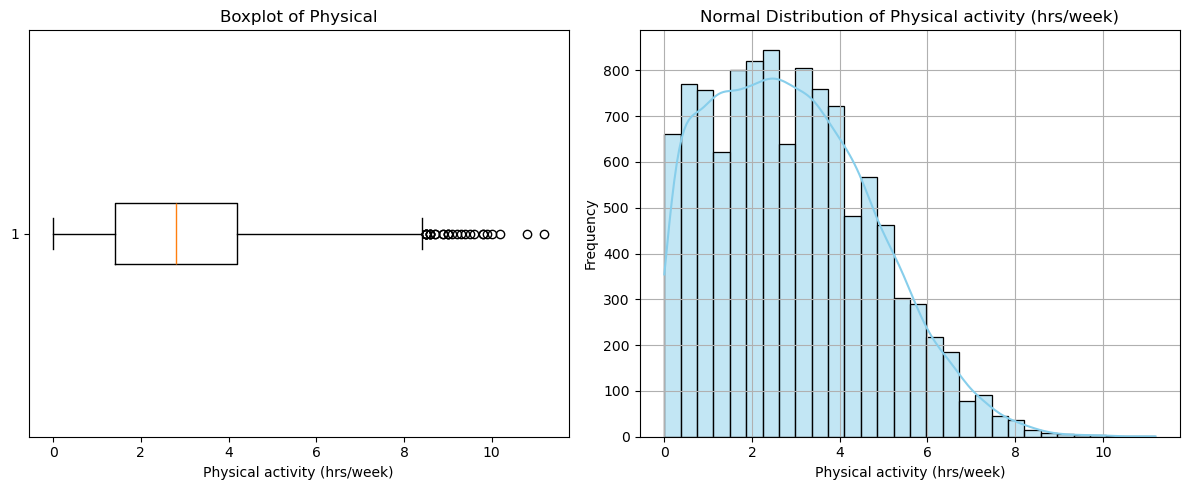

In [46]:
boxPlot_normaldist(df['Physical Activity (hrs/week)'],"Physical activity (hrs/week)")

# Testing the log method

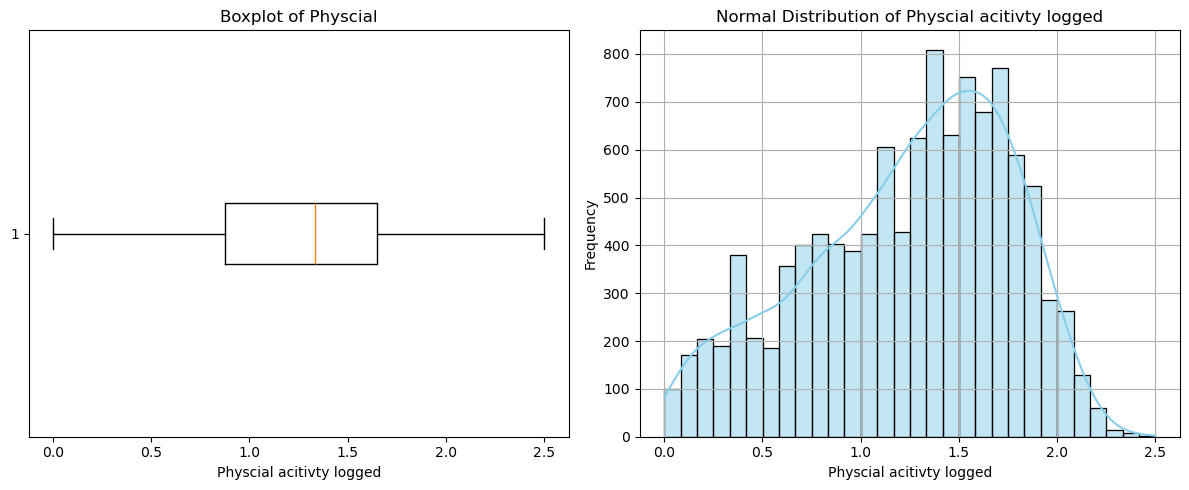

In [47]:
boxPlot_normaldist(np.log1p(df['Physical Activity (hrs/week)']),"Physcial acitivty logged")

<span style="color:green">Now that is much better... not perfect but good enough<span>

# Get Yes / No columns 

In [48]:
yes_no_columns = [col for col in df.columns if df[col].isin(['Yes', 'No']).all()]

# Encode them to binary

In [49]:
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_8152\3608185728.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


# Check heart Heart Rate (bpm)

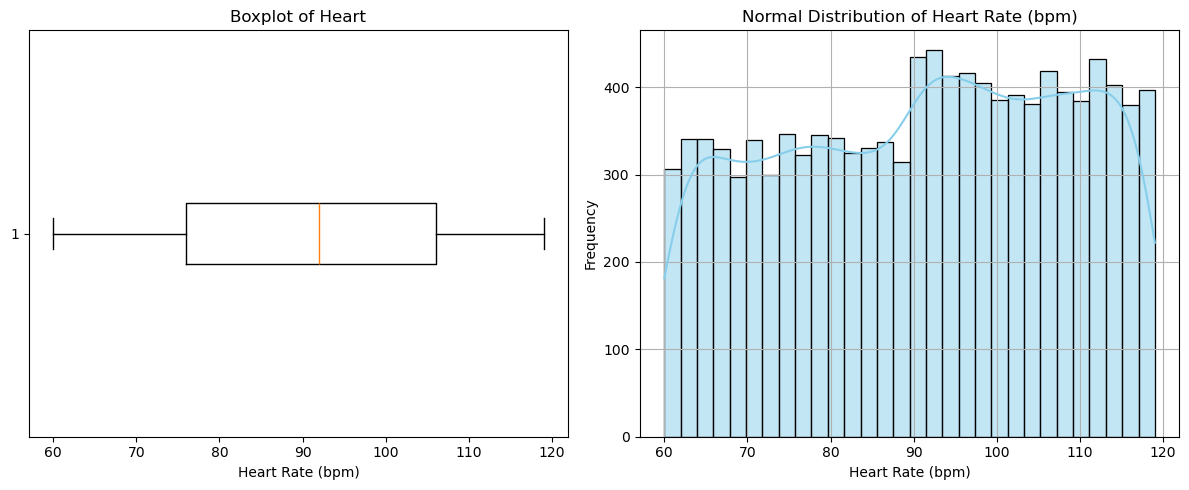

In [50]:
boxPlot_normaldist(df['Heart Rate (bpm)'],"Heart Rate (bpm)")


# We need corr matrix to determine some things

Text(0.5, 1.0, 'Correlation Matrix')

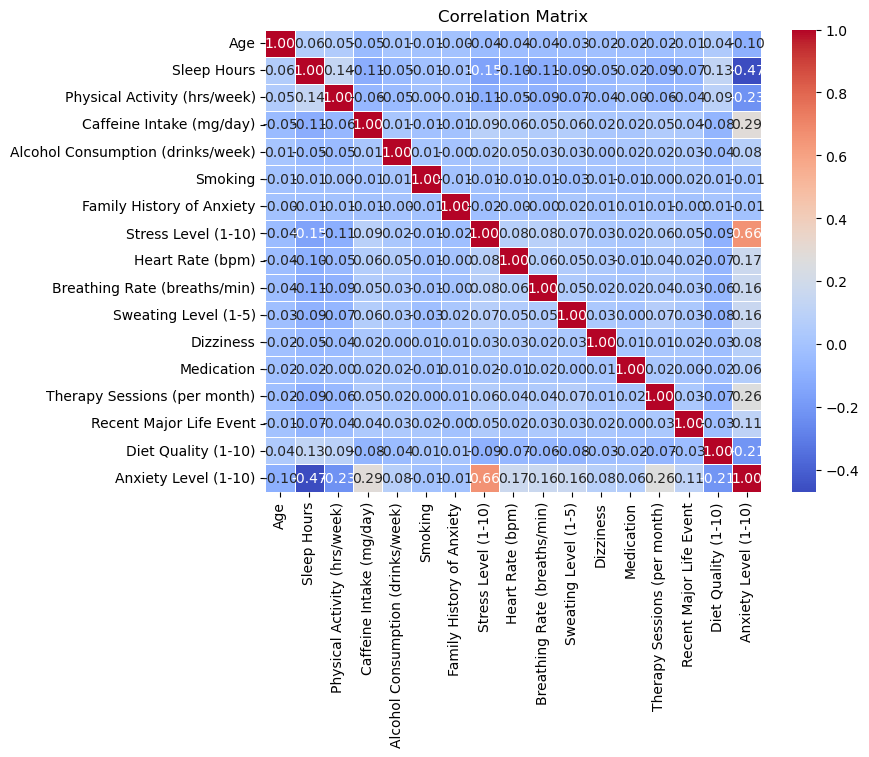

In [51]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_numerical = df.drop(columns=categorical_columns)

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

**Since there is not high correlation between heart rate and anxiery level we are okay**

# Check for stress levels
`Hence: The most important column` 

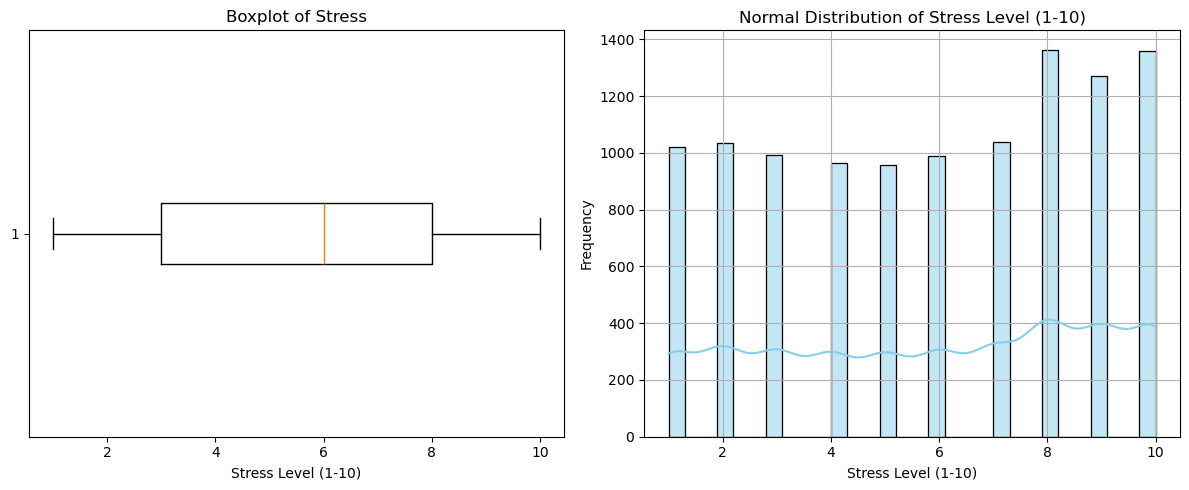

In [52]:
boxPlot_normaldist(df['Stress Level (1-10)'],"Stress Level (1-10)")


**No outliers we are good**

`The normal dist looks like this because actually this is a discrete value`

# Check linearity using normal plots

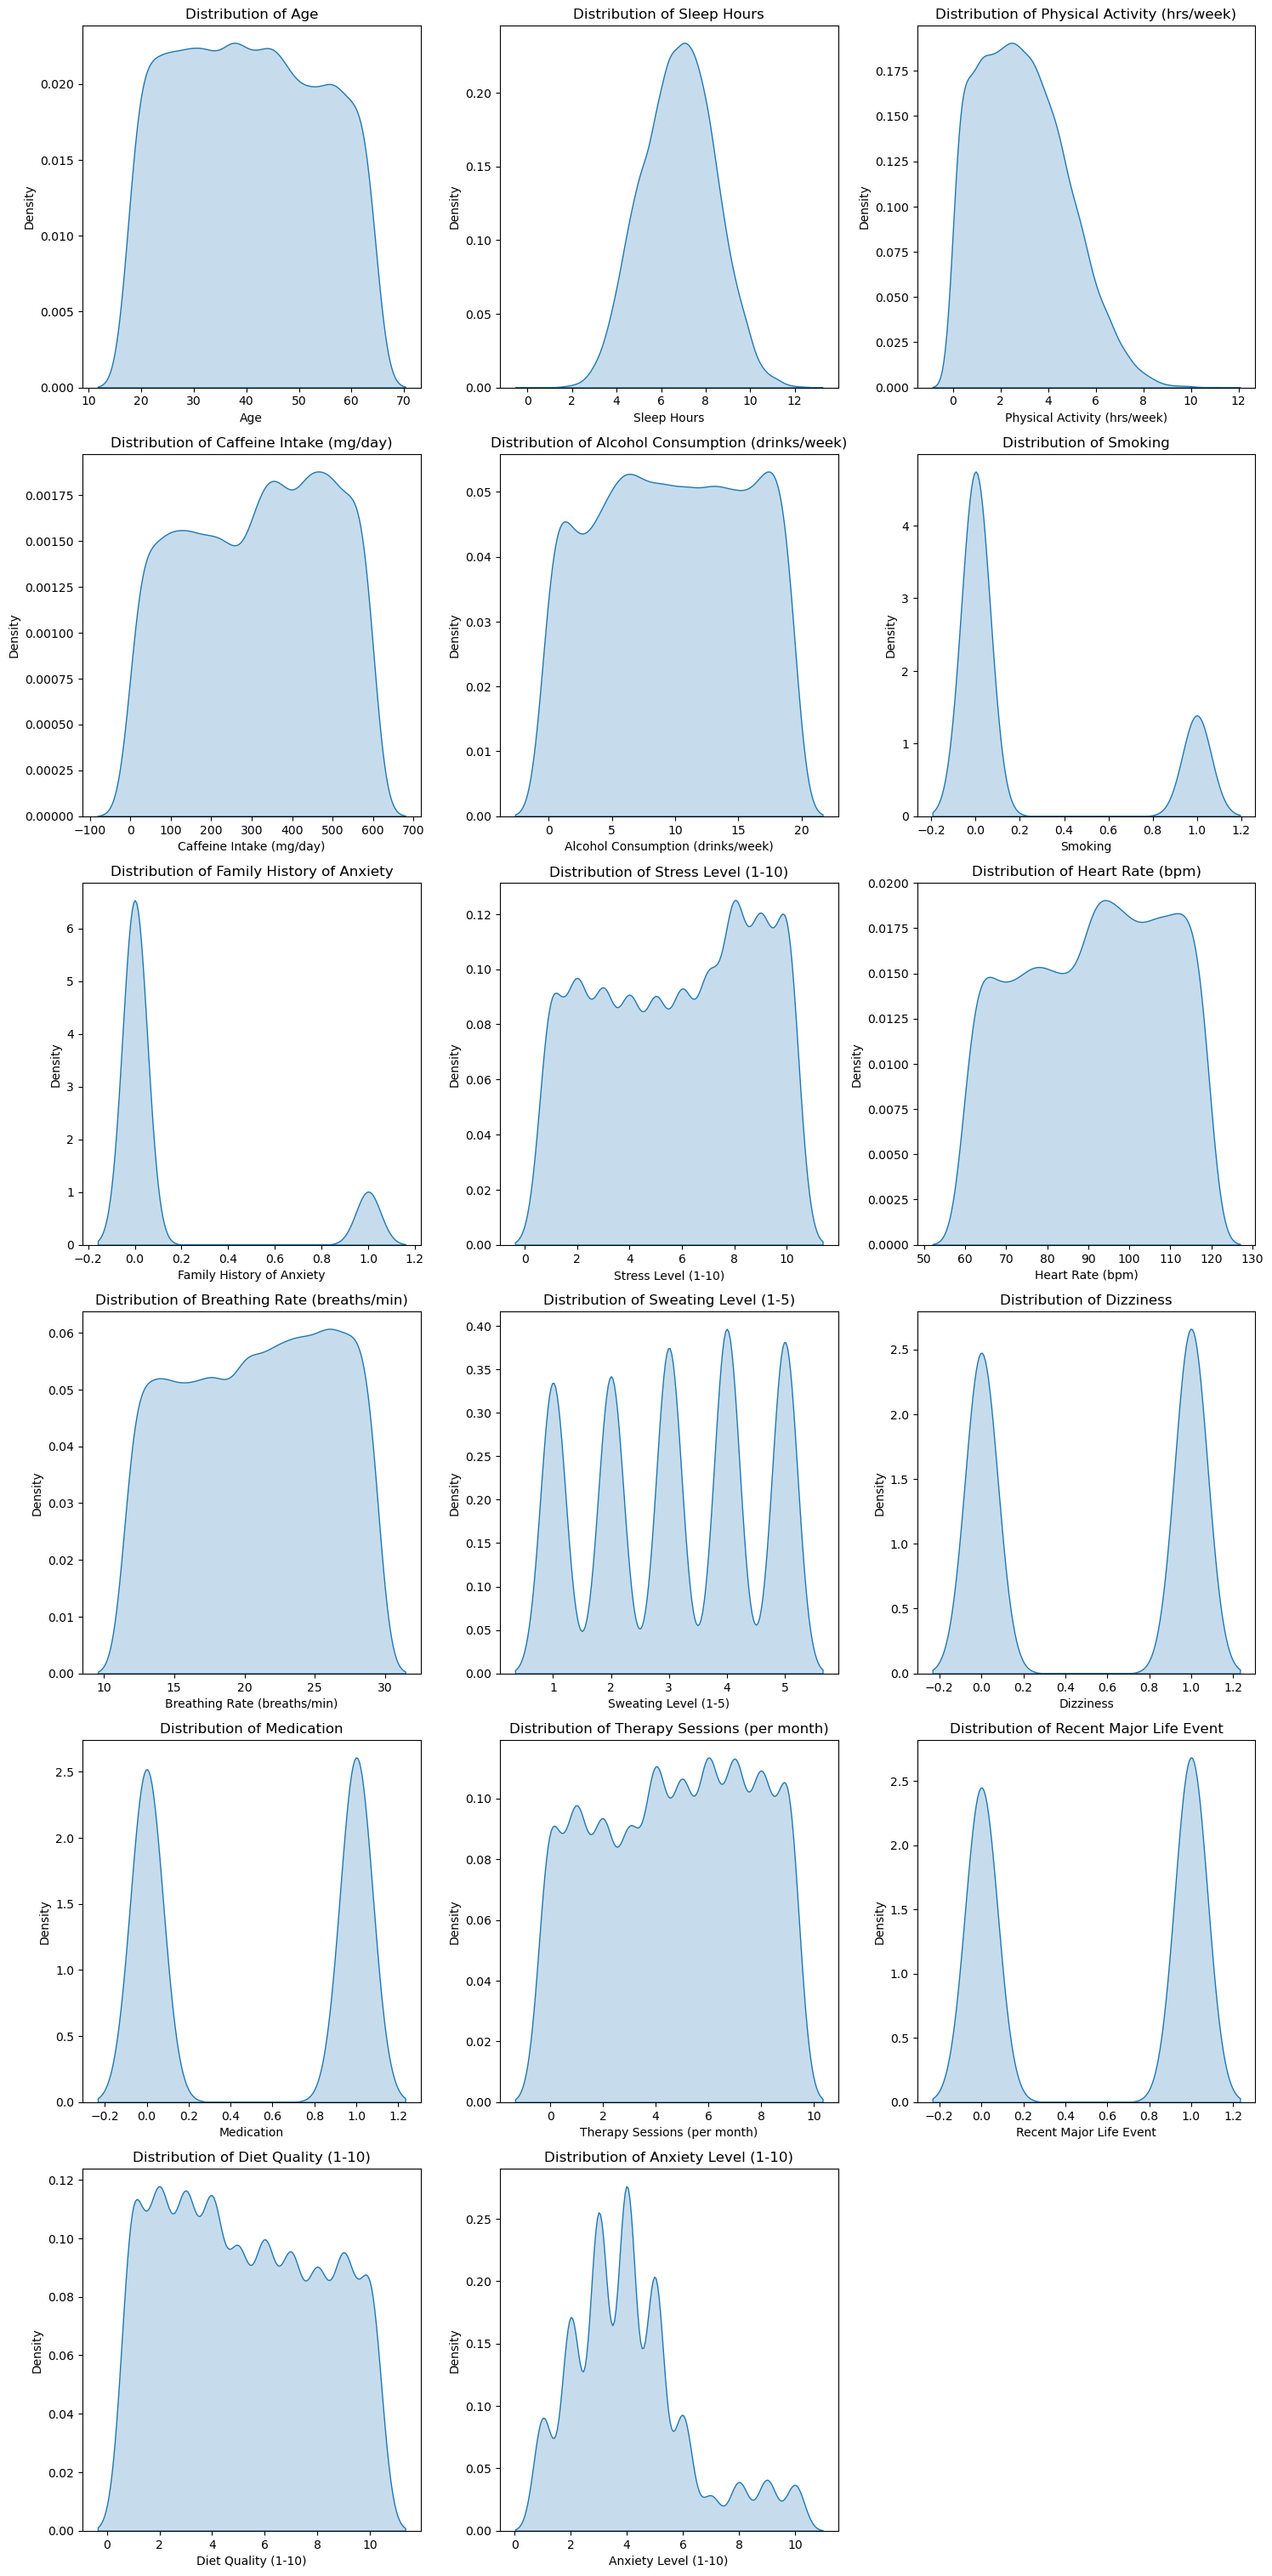

<Figure size 640x480 with 0 Axes>

In [53]:

target = 'Anxiety Level (1-10)'

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns


num_cols = len(df.columns)  # total number of columns
num_rows = (num_cols + 2) // 3  # 3 plots per row
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and plot the distribution
plot_num = 1
for col in numerical_cols:
    plt.subplot(num_rows, 3, plot_num)
    sns.kdeplot(df[col], fill=True)  # KDE plot for each column
    plt.title(f'Distribution of {col}')
    plot_num += 1

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


# Visualization and gathering insights

# 1. Bar Plot: Gender vs. Average Anxiety Level

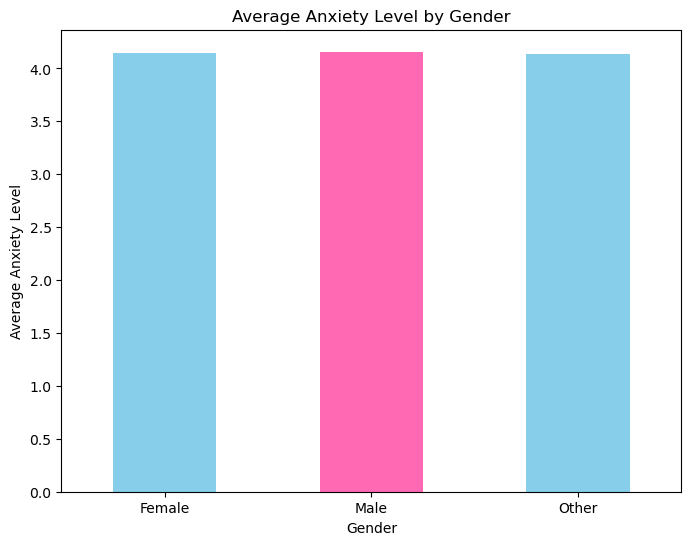

In [54]:
plt.figure(figsize=(8, 6))
gender_anxiety = df.groupby('Gender')['Anxiety Level (1-10)'].mean()
gender_anxiety.plot(kind='bar', color=['#87CEEB', '#FF69B4'])
plt.title('Average Anxiety Level by Gender')
plt.ylabel('Average Anxiety Level')
plt.xticks(rotation=0)
plt.show()

# 2. Heat map: Age vs. Anxiety Level

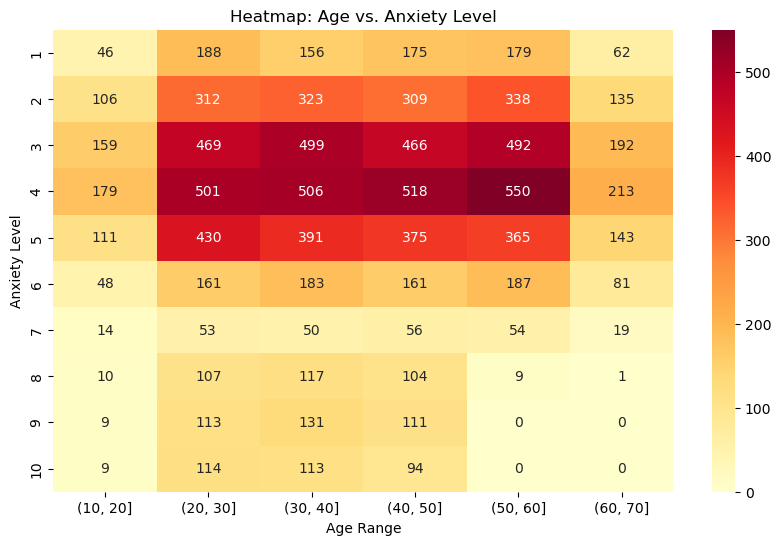

In [55]:
bins = np.arange(0, df['Age'].max() + 10, 10)
# Create 2D histogram (cross-tabulation of Age and Anxiety_Level)
heatmap_data = pd.crosstab(df['Anxiety Level (1-10)'], pd.cut(df['Age'], bins=bins))

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmap: Age vs. Anxiety Level')
plt.xlabel('Age Range')
plt.ylabel('Anxiety Level')
plt.show()


# 3. Bar Plot: Smoking vs. Average Anxiety Level

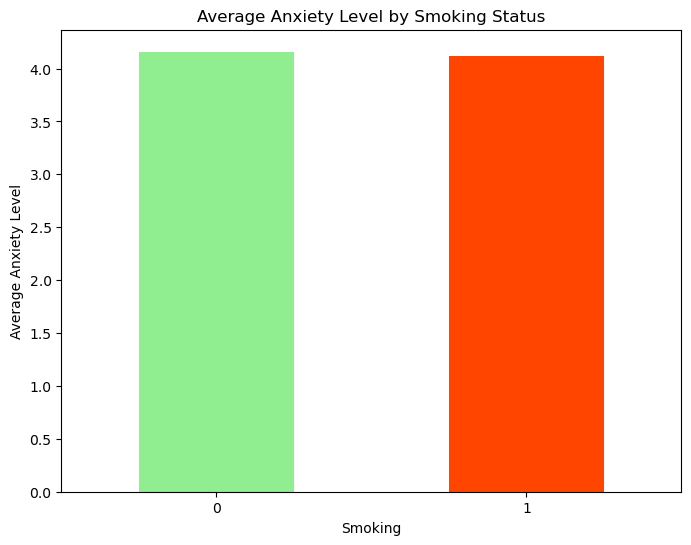

In [56]:
plt.figure(figsize=(8, 6))
smoking_anxiety = df.groupby('Smoking')['Anxiety Level (1-10)'].mean()
smoking_anxiety.plot(kind='bar', color=['#90EE90', '#FF4500'])
plt.title('Average Anxiety Level by Smoking Status')
plt.ylabel('Average Anxiety Level')
plt.xticks(rotation=0)
plt.show()

# 4. Anxiery levels by family history of anxiety

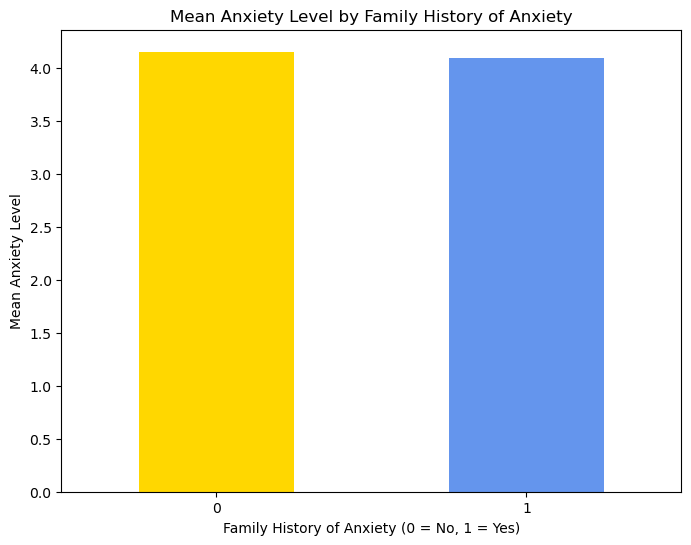

In [57]:
plt.figure(figsize=(8, 6))
family_anxiety_mean = df.groupby('Family History of Anxiety')['Anxiety Level (1-10)'].mean()
family_anxiety_mean.plot(kind='bar', color=['#FFD700', '#6495ED'])
plt.title('Mean Anxiety Level by Family History of Anxiety')
plt.ylabel('Mean Anxiety Level')
plt.xlabel('Family History of Anxiety (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.show()


# 5. Bar Plot: Average Sleep Hours by Anxiety Level

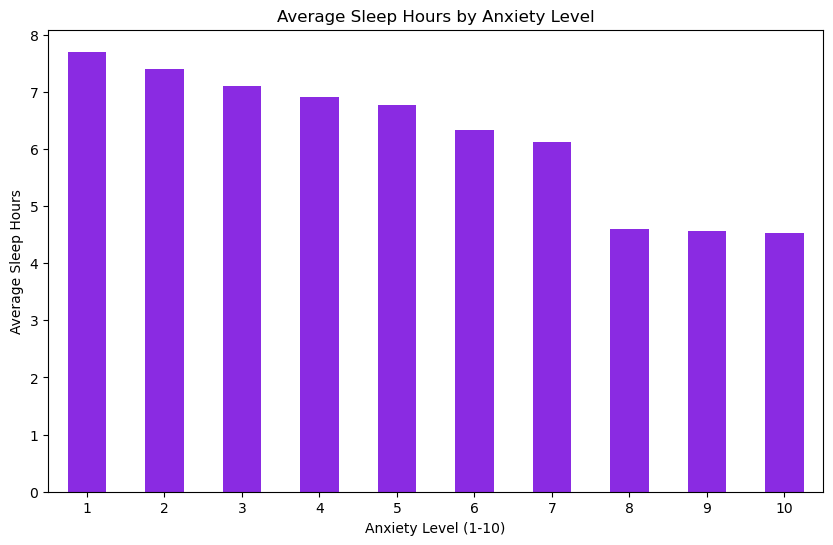

In [58]:
plt.figure(figsize=(10, 6))
sleep_anxiety = df.groupby('Anxiety Level (1-10)')['Sleep Hours'].mean()
sleep_anxiety.plot(kind='bar', color='#8A2BE2')
plt.title('Average Sleep Hours by Anxiety Level')
plt.ylabel('Average Sleep Hours')
plt.xticks(rotation=0)
plt.show()


# 6. Scatter Plot: Heart Rate vs. Anxiety Level

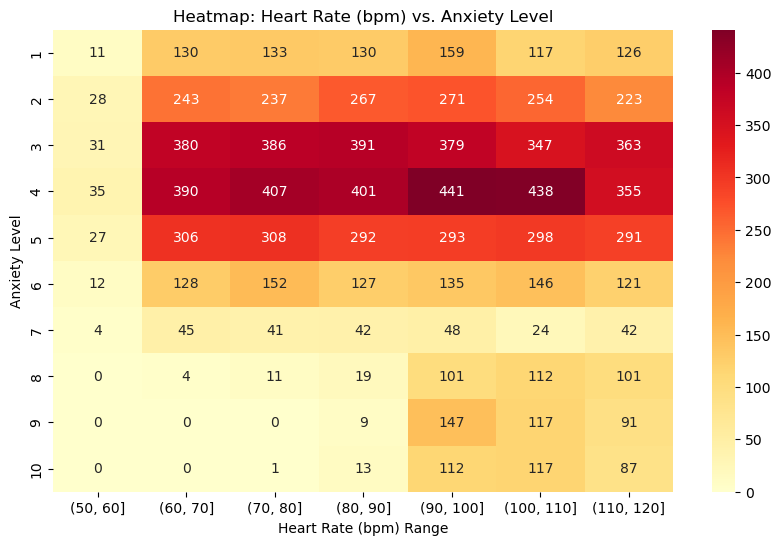

In [59]:

bins = np.arange(0, df['Heart Rate (bpm)'].max() + 10, 10)
heatmap_data = pd.crosstab(df['Anxiety Level (1-10)'], pd.cut(df['Heart Rate (bpm)'], bins=bins))

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmap: Heart Rate (bpm) vs. Anxiety Level')
plt.xlabel('Heart Rate (bpm) Range')
plt.ylabel('Anxiety Level')
plt.show()


**Heatmap might be a little bit misleading here because 50-60 heart rate is quite rare so this can be the reason why we didn't observe any high level social anxity in people with 50-60 heartrate**

# 7. Bar Plot: Therapy Sessions vs. Average Anxiety Level

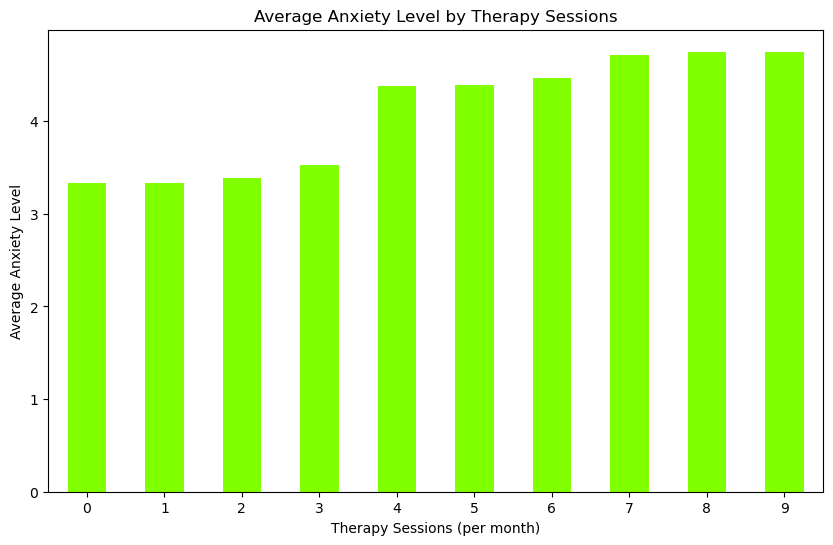

In [60]:
plt.figure(figsize=(10, 6))
therapy_anxiety = df.groupby('Therapy Sessions (per month)')['Anxiety Level (1-10)'].mean()
therapy_anxiety.plot(kind='bar', color='#7FFF00')
plt.title('Average Anxiety Level by Therapy Sessions')
plt.ylabel('Average Anxiety Level')
plt.xticks(rotation=0)
plt.show()

# 8. Pie Chart: Medication Use

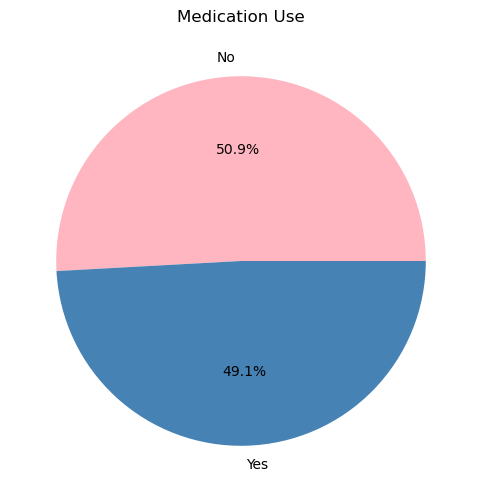

In [61]:
plt.figure(figsize=(8, 6))
medication_counts = df['Medication'].value_counts()
plt.pie(medication_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#FFB6C1', '#4682B4'])
plt.title('Medication Use')
plt.show()

# 9. Scatter Plot: Physical Activity vs. Anxiety Level

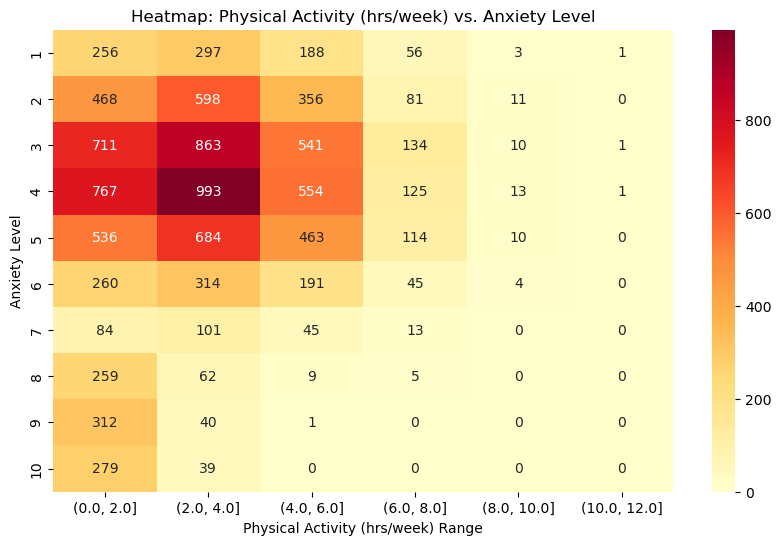

In [62]:

bins = np.arange(0, df['Physical Activity (hrs/week)'].max() + 10, 2)
# Create 2D histogram (cross-tabulation of Age and Anxiety_Level)
heatmap_data = pd.crosstab(df['Anxiety Level (1-10)'], pd.cut(df['Physical Activity (hrs/week)'], bins=bins))

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmap: Physical Activity (hrs/week) vs. Anxiety Level')
plt.xlabel('Physical Activity (hrs/week) Range')
plt.ylabel('Anxiety Level')
plt.show()


# 10. Bar Plot: Alcohol Consumption vs. Average Anxiety Level

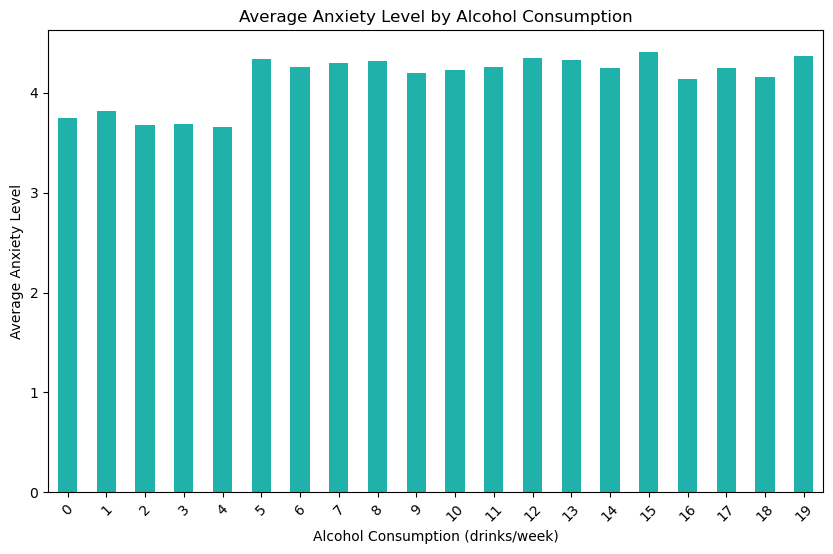

In [63]:
plt.figure(figsize=(10, 6))
alcohol_anxiety = df.groupby('Alcohol Consumption (drinks/week)')['Anxiety Level (1-10)'].mean()
alcohol_anxiety.plot(kind='bar', color='#20B2AA')
plt.title('Average Anxiety Level by Alcohol Consumption')
plt.ylabel('Average Anxiety Level')
plt.xticks(rotation=45)
plt.show()

# One hot encode categorial columns

In [64]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Occupation'], dtype='object')

In [65]:
df_encoded = pd.get_dummies(df, drop_first=False)

df_encoded = df_encoded.astype(int)

df_encoded

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,58,6,1,192,16,0,1,1,117,21,...,0,0,0,0,0,1,0,0,0,0
1,39,8,3,367,15,0,0,10,113,14,...,0,1,0,0,0,0,0,0,0,0
2,42,6,0,132,1,0,0,10,79,20,...,1,0,0,0,0,0,0,0,0,0
3,43,7,1,361,15,0,0,4,69,25,...,0,0,0,0,0,0,0,0,0,0
4,55,7,2,531,0,0,0,3,65,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,42,11,3,2,3,0,0,1,65,26,...,0,0,0,0,0,0,0,0,0,0
10996,45,6,3,31,18,0,0,4,111,23,...,0,0,0,1,0,0,0,0,0,0
10997,38,7,2,222,6,0,1,10,98,28,...,0,0,0,1,0,0,0,0,0,0
10998,28,8,6,405,13,0,0,8,118,27,...,0,0,0,1,0,0,0,0,0,0


# Test with normal Regrisson
`No log() was used`

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop(columns=['Anxiety Level (1-10)'])
y = df_encoded['Anxiety Level (1-10)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Predicted Trip Times: {y_pred}")

Mean Squared Error: 1.5575024028846447
R^2 Score: 0.6650572798149601
Predicted Trip Times: [4.29945536 5.43384186 3.62795687 ... 5.18028612 3.01724839 5.09640624]


# Test with log of predicted value

In [67]:

X = df_encoded.drop(columns=['Anxiety Level (1-10)'])
y = df_encoded['Anxiety Level (1-10)']
y_log = np.log1p(y)  


X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=55)

model = LinearRegression()
model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Squared Error (after inverse transform): {mse}")
print(f"R^2 Score (after inverse transform): {r2}")
print(f"Predicted Anxiety Levels: {y_pred}")


Mean Squared Error (after inverse transform): 1.4567822103385515
R^2 Score (after inverse transform): 0.6867172754634214
Predicted Anxiety Levels: [3.95857523 5.37646018 3.18455159 ... 4.95544274 2.92603073 4.93107241]


`There is a slight improvment which is good!`

# Apply log to other columns

In [68]:


X = df_encoded.drop(columns=['Anxiety Level (1-10)']).copy()

log_columns = ['Heart Rate (bpm)','Physical Activity (hrs/week)']

for col in log_columns:
    X[col] = np.log1p(X[col])

y = df_encoded['Anxiety Level (1-10)']
y_log = np.log1p(y)

# Train/test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=55)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train_log)

# Predict and inverse-transform
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

# Evaluate
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Squared Error (after inverse transform): {mse}")
print(f"R^2 Score (after inverse transform): {r2}")
print(f"Predicted Anxiety Levels: {y_pred}")


Mean Squared Error (after inverse transform): 1.4522935180112801
R^2 Score (after inverse transform): 0.687682574017944
Predicted Anxiety Levels: [3.96795123 5.37686216 3.17093558 ... 4.95625554 2.97149852 4.91219732]


`After multiple tests the log of those 2 columns helps the most`

# Testing with neural network

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Prepare the data
X = df_encoded.drop(columns=['Anxiety Level (1-10)'])
y = df_encoded['Anxiety Level (1-10)']

# y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 5. Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# 6. Predict and evaluate
y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (NN): {mse}")
print(f"R² Score (NN): {r2}")


c:\Users\mahmo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean Squared Error (NN): 1.9537383177372794
R² Score (NN): 0.5770878791809082


# Ridge Regression (L2 Regularization):


In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded is already loaded

# Prepare features and target variable
X = df_encoded.drop(columns=['Anxiety Level (1-10)']).copy()

# Log transform selected columns
log_columns = ['Heart Rate (bpm)', 'Physical Activity (hrs/week)']
for col in log_columns:
    X[col] = np.log1p(X[col])

y = df_encoded['Anxiety Level (1-10)']
y_log = np.log1p(y)

# Train/test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=55)

# Feature scaling (important for Ridge regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha to adjust regularization strength
ridge_model.fit(X_train, y_train_log)

# Predict and inverse-transform
y_pred_log = ridge_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

# Evaluate
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Output results
print(f"Mean Squared Error (after inverse transform): {mse}")
print(f"R^2 Score (after inverse transform): {r2}")
print(f"Predicted Anxiety Levels: {y_pred}")



Mean Squared Error (after inverse transform): 1.4523075378358687
R^2 Score (after inverse transform): 0.6876795590382075
Predicted Anxiety Levels: [3.96789835 5.37661918 3.17100773 ... 4.95609821 2.97154124 4.91201331]


# Random Forest Regression

Mean Squared Error: 1.1199026363636362
R^2 Score: 0.7575825107552819


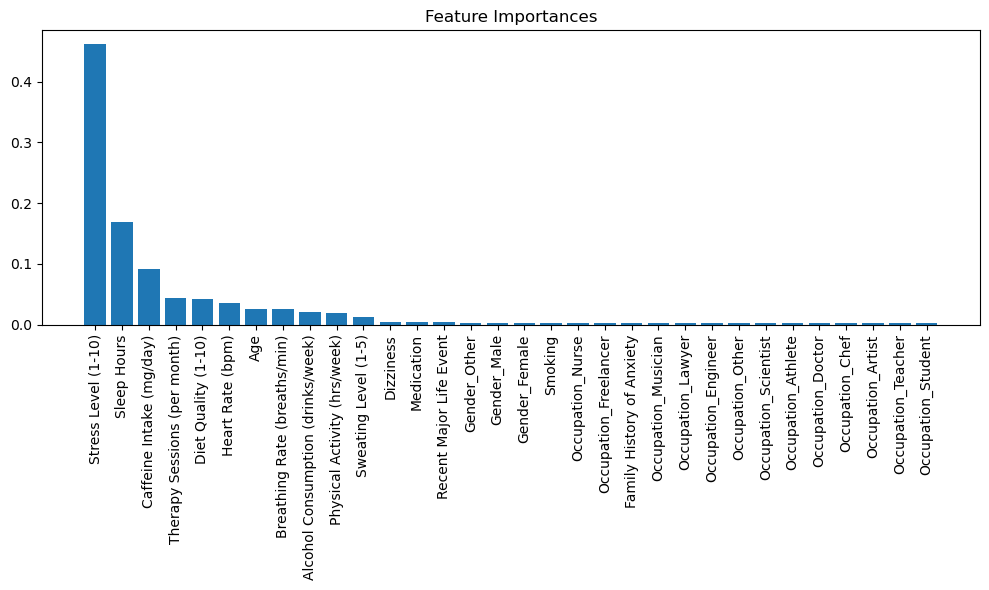

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df_encoded is already loaded and contains no missing values

# Prepare features and target variable
X = df_encoded.drop(columns=['Anxiety Level (1-10)'])
y = df_encoded['Anxiety Level (1-10)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


# Try with the most important columns

Mean Squared Error: 1.123328
R^2 Score: 0.7568410462515696


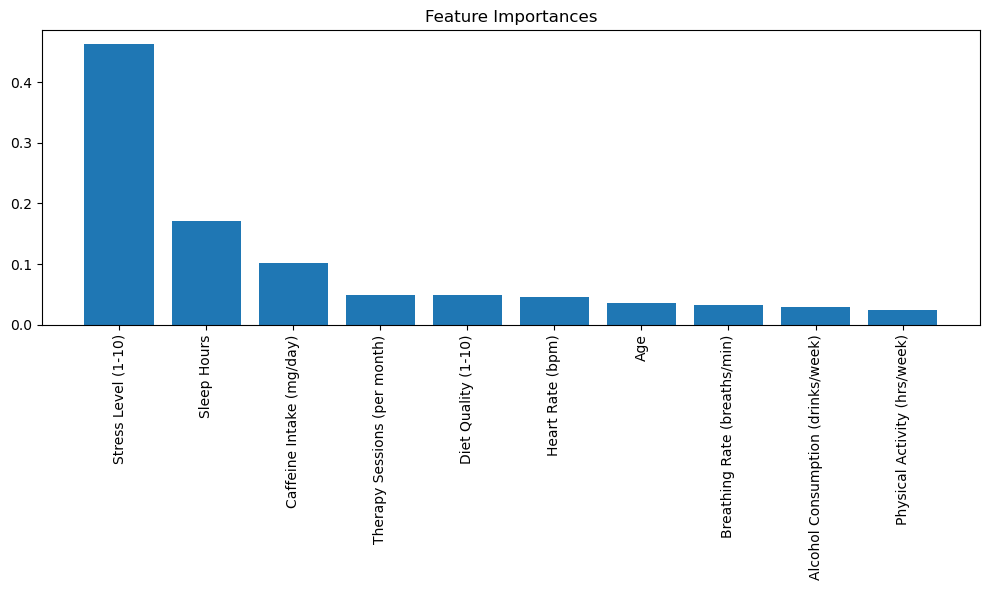

In [72]:
top_features = [
    'Stress Level (1-10)',
    'Sleep Hours',
    'Caffeine Intake (mg/day)',
    'Therapy Sessions (per month)',
    'Diet Quality (1-10)',
    'Heart Rate (bpm)',
    'Age',
    'Breathing Rate (breaths/min)',
    'Alcohol Consumption (drinks/week)',
    'Physical Activity (hrs/week)',
    'Anxiety Level (1-10)'
]

df_top10 = df_encoded[top_features]

X = df_top10.drop(columns=['Anxiety Level (1-10)'])
y = df_top10['Anxiety Level (1-10)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

`Even if they have law impact they still help`

# Log with forest regression model

Mean Squared Error: 1.1192143181818182
R^2 Score: 0.7577315061768657


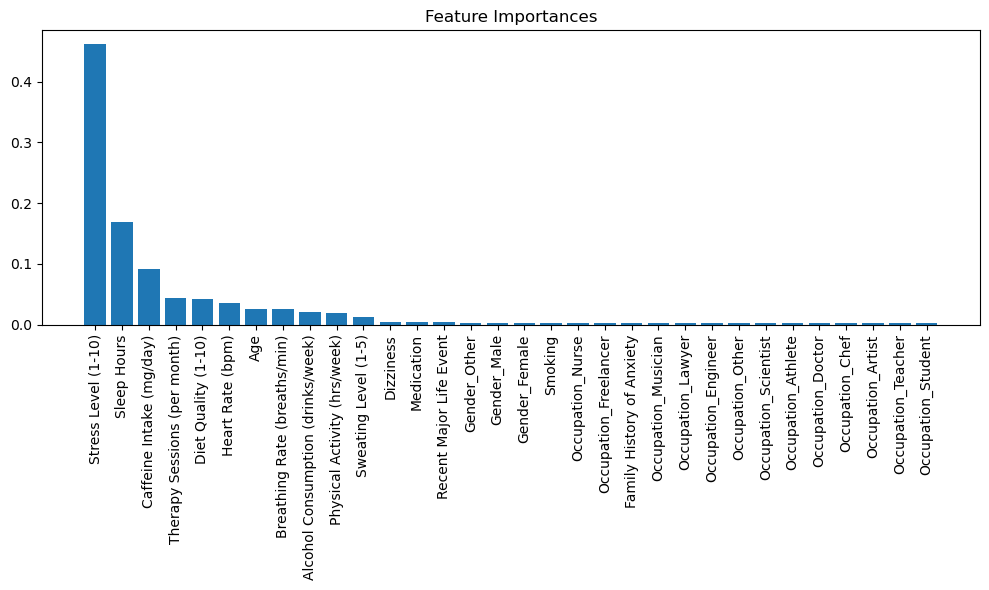

In [75]:


# Prepare features and target
x = df_encoded.drop(columns=['Anxiety Level (1-10)'])
y = df_encoded['Anxiety Level (1-10)']

# Apply log1p to all feature columns
log_columns = ['Heart Rate (bpm)', 'Physical Activity (hrs/week)']
for col in log_columns:
    x[col] = np.log1p(X[col])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
